In [27]:
import pandas as pd
data = pd.read_csv('house_prices.csv')
print(data.head())

    neighborhood  size_sqft  bedrooms  bathrooms  age_years  lot_size_sqft  \
0     Beachfront       2652         3        1.5         49           6001   
1  Mountain View       2010         4        3.0          9           6990   
2          Rural       2340         4        1.5         20           9681   
3  Mountain View       1844         4        2.5         35           9093   
4  Mountain View       2162         3        2.5         11           7522   

   parking_spots  has_pool  has_garden  condition energy_rating  \
0              1         0           1       Good             A   
1              1         0           1       Poor             B   
2              3         0           0  Excellent             B   
3              1         0           0       Fair             A   
4              2         0           0       Fair             C   

   distance_downtown  distance_highway  school_rating  crime_rate    price  
0                3.7               0.3       6.3729

In [28]:
print(data[['size_sqft', 'bedrooms', 'bathrooms', 'price']].describe())
# hree i display some basic statistics and etc

         size_sqft    bedrooms   bathrooms         price
count   500.000000  500.000000  500.000000  5.000000e+02
mean   1991.654000    3.432000    2.496000  9.755731e+05
std     492.012034    0.806646    0.989921  2.668696e+05
min     651.000000    2.000000    1.000000  4.553650e+05
25%    1646.000000    3.000000    1.500000  7.888190e+05
50%    1990.000000    3.000000    2.500000  9.405330e+05
75%    2311.250000    4.000000    3.500000  1.129033e+06
max    3539.000000    5.000000    4.000000  2.074793e+06


In [29]:
neighborhood_prices = data.groupby('neighborhood')['price'].mean().sort_values()
print(neighborhood_prices)

neighborhood
Rural            7.683429e+05
Suburban         8.680947e+05
Downtown         9.903632e+05
Mountain View    1.037661e+06
Beachfront       1.169163e+06
Name: price, dtype: float64


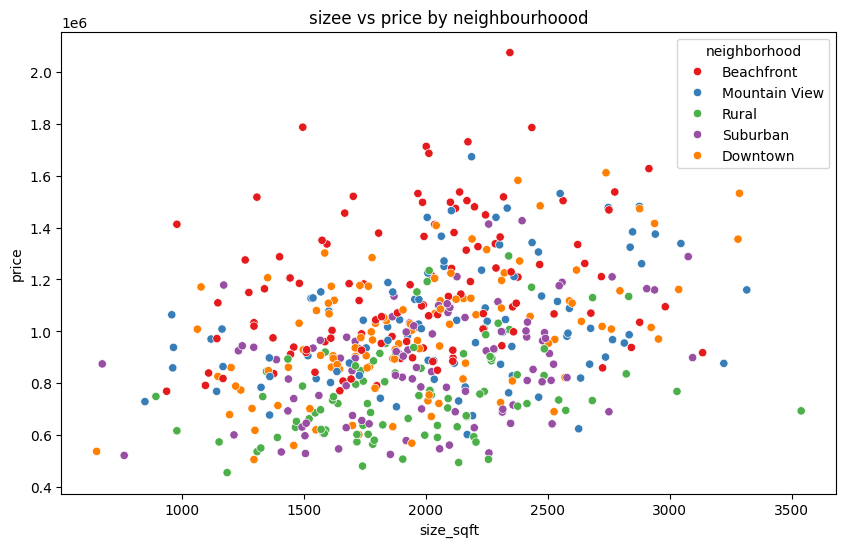

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='size_sqft', y='price', hue='neighborhood', palette='Set1')
plt.title('sizee vs price by neighbourhoood')
plt.show()

C:\Users\NOIKO\AppData\Local\Temp\ipykernel_8280\2896030874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_bedrooms, x='bedrooms', y='price', palette='Blues')


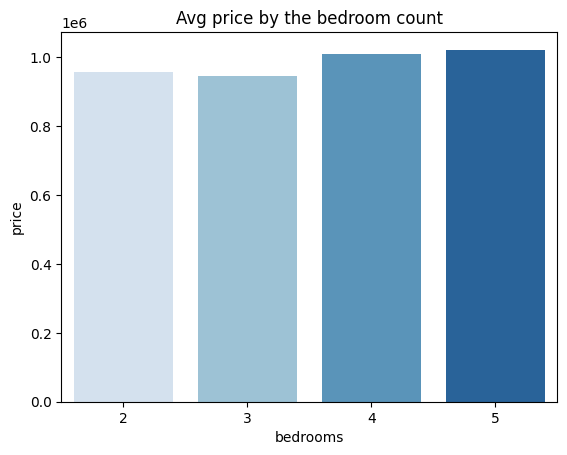

In [31]:
avg_price_bedrooms = data.groupby('bedrooms')['price'].mean().reset_index()
sns.barplot(data=avg_price_bedrooms, x='bedrooms', y='price', palette='Blues')
plt.title('Avg price by the bedroom count')
plt.show()

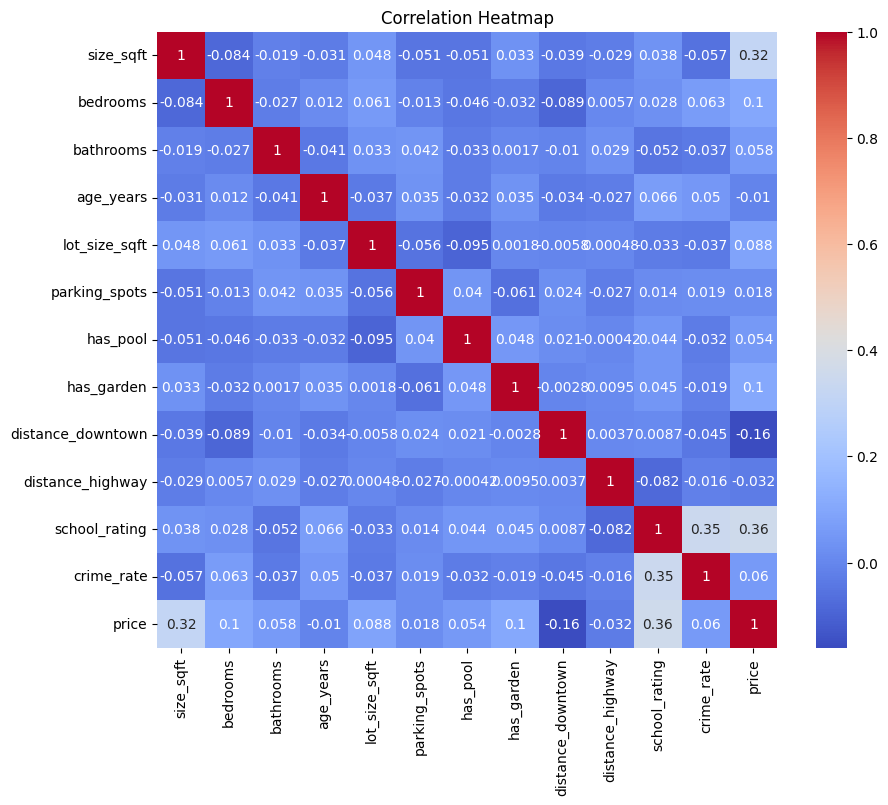

In [32]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [33]:
data['price_per_sqft'] = data['price'] / data['size_sqft']
print(data[['price', 'size_sqft', 'price_per_sqft']].head())

     price  size_sqft  price_per_sqft
0  1261716       2652      475.760181
1   888272       2010      441.926368
2  1290753       2340      551.603846
3  1016792       1844      551.405640
4   785409       2162      363.278908


In [34]:
data['location_value_score'] = data['school_rating'] - data['crime_rate']
print(data['location_value_score'].head())

0    4.994118
1    7.061442
2    5.116594
3    6.370854
4    3.519003
Name: location_value_score, dtype: float64


In [48]:
value_for_money = data.sort_values(by='price_per_sqft', ascending=True).head(10)
print(value_for_money[['neighborhood', 'price_per_sqft', 'location_value_score']])

      neighborhood  price_per_sqft  location_value_score
164          Rural      195.922860              4.138475
95           Rural      224.426230              4.394546
196          Rural      231.453864              4.574731
46        Suburban      235.063745              2.739725
494  Mountain View      237.631138              4.661780
120       Suburban      250.787714              5.118863
106          Rural      253.571617              3.424286
280       Suburban      255.438840              3.324729
290          Rural      259.753853              5.428835
103       Suburban      265.924161              4.744329


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = data[['size_sqft', 'distance_downtown', 'school_rating']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R-squared: {r2_score(y_test, y_pred):.2f}")
print(f"Mean absolute error is justt: {mean_absolute_error(y_test, y_pred):,.2f}")

R-squared: 0.20
Mean absolute error is justt: 179,216.46


In [53]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

for name, m in models.items():
    scores = cross_val_score(m, X, y, cv=5, scoring='r2')
    print(f"{name} Model Average R-squared: {scores.mean():.2f}")


Linear Model Average R-squared: 0.20
Ridge Model Average R-squared: 0.20
Lasso Model Average R-squared: 0.20


In [54]:
neighborhood_stats = data.groupby('neighborhood').agg({
    'price': ['mean', 'median', 'std']
})
print(neighborhood_stats)

                      price                          
                       mean     median            std
neighborhood                                         
Beachfront     1.169163e+06  1109187.5  267796.197720
Downtown       9.903632e+05   975898.0  234912.277186
Mountain View  1.037661e+06  1008867.0  233273.023114
Rural          7.683429e+05   740932.0  181189.192889
Suburban       8.680947e+05   874409.0  208137.543847


C:\Users\NOIKO\AppData\Local\Temp\ipykernel_8280\4249637833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bracket_prices = data.groupby('age_bracket')['price'].mean()


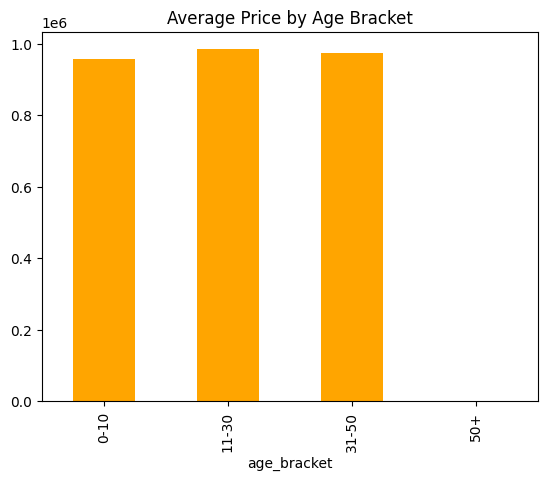

In [55]:
data['age_bracket'] = pd.cut(data['age_years'], bins=[0, 10, 30, 50, 100], labels=['0-10', '11-30', '31-50', '50+'])
age_bracket_prices = data.groupby('age_bracket')['price'].mean()
age_bracket_prices.plot(kind='bar', color='orange')
plt.title('Average Price by Age Bracket')
plt.show()

In [57]:
amenities = ['has_pool', 'has_garden', 'parking_spots']
for amenity in amenities:
    avg_price = data.groupby(amenity)['price'].mean()
    print(f"\n{amenity.capitalize()} Impact on Prices:")
    print(avg_price)


Has_pool Impact on Prices:
has_pool
0    9.682366e+05
1    1.003850e+06
Name: price, dtype: float64

Has_garden Impact on Prices:
has_garden
0    933776.954248
1    994001.899135
Name: price, dtype: float64

Parking_spots Impact on Prices:
parking_spots
0    9.736552e+05
1    9.751788e+05
2    9.693395e+05
3    1.006471e+06
Name: price, dtype: float64


In [58]:
data['location_quality_score'] = data['school_rating'] / data['distance_downtown']
optimal_locations = data.sort_values(by='location_quality_score', ascending=False).head(5)
print(optimal_locations[['neighborhood', 'location_quality_score']])

    neighborhood  location_quality_score
321     Suburban               13.304472
155     Downtown               13.246529
64      Suburban               13.216246
219     Downtown               10.101598
425     Suburban               10.100895


In [59]:
# here i just define the market segments
luxury_threshold = data['price'].quantile(0.75)
data['market_segment'] = data['price'].apply(lambda x: 'Luxury' if x >= luxury_threshold else 'Standard')

luxury_data = data[data['market_segment'] == 'Luxury']
standard_data = data[data['market_segment'] == 'Standard']
print("here are legment features:")
print(luxury_data.describe())
print("here are standard segment features:")
print(standard_data.describe())


here are legment features:
         size_sqft    bedrooms   bathrooms   age_years  lot_size_sqft  \
count   125.000000  125.000000  125.000000  125.000000     125.000000   
mean   2213.560000    3.536000    2.576000   24.376000    8382.072000   
std     491.862743    0.828368    0.941978   13.906754    1766.020746   
min     980.000000    2.000000    1.000000    0.000000    4212.000000   
25%    1987.000000    3.000000    2.000000   14.000000    7259.000000   
50%    2190.000000    4.000000    2.500000   22.000000    8329.000000   
75%    2547.000000    4.000000    3.500000   36.000000    9508.000000   
max    3316.000000    5.000000    4.000000   49.000000   14275.000000   

       parking_spots    has_pool  has_garden  distance_downtown  \
count     125.000000  125.000000  125.000000         125.000000   
mean        1.688000    0.232000    0.760000           9.261600   
std         0.745048    0.423808    0.428802           5.346627   
min         0.000000    0.000000    0.000000   